In [59]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
plt.style.use("seaborn-muted")
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({"font.size": 18})

In [60]:
fancy_log = pd.read_csv("log_proba.csv")
simple_log = pd.read_csv("simple_log_mod.csv").iloc[:,1]
rf = pd.read_csv("score_rf.csv").iloc[:,1]
xg = pd.read_csv("score_xgb.csv").iloc[:,1]
truth = pd.read_csv("../15_modified_data/test_data.csv")
truth = truth["nonzero_tip"]
models = {
    "Sklearn Logistic": fancy_log,
    "Interpretable Logistic": simple_log,
    "Random Forest": rf,
    "XGBoost": xg,
}


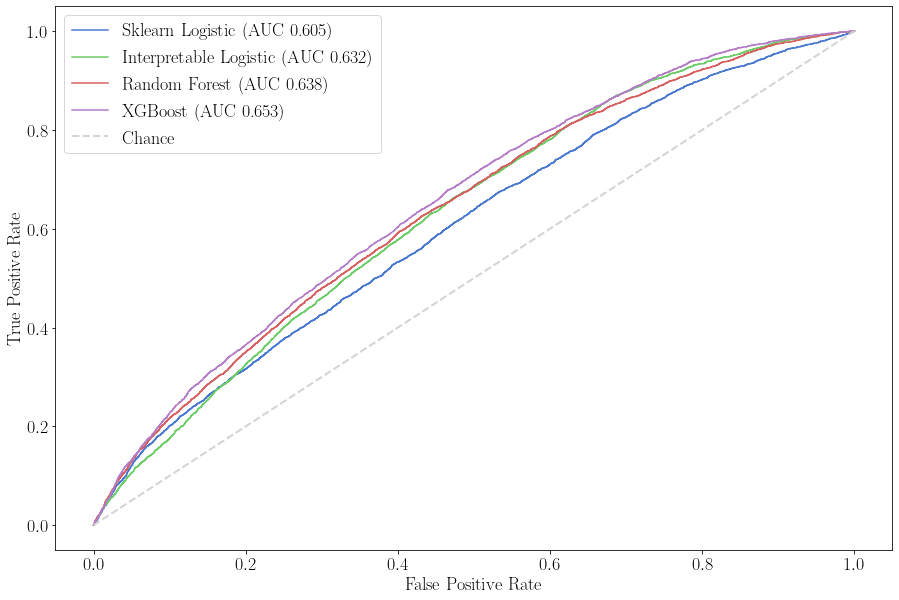

In [62]:
for label, model in models.items():
    if label == "Sklearn Logistic":
        temp_truth = pd.read_csv("../15_modified_data/test_data.csv")
        temp_truth = temp_truth.loc[temp_truth["trip_miles"] != 0, "nonzero_tip"]
        auc = roc_auc_score(temp_truth, model)
        fpr, tpr, _ = roc_curve(temp_truth, model)
        plt.plot(fpr, tpr, label = label + f" (AUC {round(auc,3)})")
    else:
        auc = roc_auc_score(truth, model)
        fpr, tpr, _ = roc_curve(truth, model)
        auc = roc_auc_score(truth, model)
        plt.plot(fpr, tpr, label = label + f" (AUC {round(auc,3)})")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="lightgray", label="Chance")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.savefig("../26_images/roc_auc.png", bbox_inches="tight", dpi=400)
plt.show()